In [124]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [125]:
tempos = pd.read_csv('logs/tempos.csv', delimiter=';')
temposO0 = pd.read_csv('logs/temposO0.csv', delimiter=';')

In [126]:
drop_lines_tempos = tempos[tempos['I'] == 0].index
tempos = tempos.drop(drop_lines_tempos)
tempos

,I,time,file,args
1,1,0.0030,./datasets/Aleatórios/a100.txt,['I']
2,2,0.0025,./datasets/Aleatórios/a100.txt,['I']
3,3,0.0020,./datasets/Aleatórios/a100.txt,['I']
4,4,0.0024,./datasets/Aleatórios/a100.txt,['I']
5,5,0.0019,./datasets/Aleatórios/a100.txt,['I']
...,...,...,...,...
1915,1,0.2406,./datasets/ParcialmenteOrdenados/po2000000.txt,"['B', '1000']"
1916,2,0.2410,./datasets/ParcialmenteOrdenados/po2000000.txt,"['B', '1000']"
1917,3,0.2479,./datasets/ParcialmenteOrdenados/po2000000.txt,"['B', '1000']"
1918,4,0.2504,./datasets/ParcialmenteOrdenados/po2000000.txt,"['B', '1000']"


In [127]:
# Extraindo apenas o número de instâncias usando regex
tempos['num_instancias'] = tempos['file'].str.extract(r'([0-9]+)\.txt')
tempos['nome_do_dataset'] = tempos['file'].str.extract(r'./datasets/([^/]+)/')
tempos['time'] = pd.to_numeric(tempos['time'], errors='coerce')
tempos['num_instancias'] = pd.to_numeric(tempos['num_instancias'], errors='coerce')


temposO0['num_instancias'] = temposO0['file'].str.extract(r'([0-9]+)\.txt')
temposO0['nome_do_dataset'] = temposO0['file'].str.extract(r'./datasets/([^/]+)/')
temposO0['time'] = pd.to_numeric(temposO0['time'], errors='coerce')
temposO0['num_instancias'] = pd.to_numeric(temposO0['num_instancias'], errors='coerce')


temposO0

,I,time,file,args,num_instancias,nome_do_dataset
0,1,0.0065,./datasets/Aleatórios/a100.txt,['I'],100,Aleatórios
1,1,0.0025,./datasets/Aleatórios/a100.txt,"['B', '10']",100,Aleatórios
2,1,0.0018,./datasets/Aleatórios/a100.txt,"['B', '100']",100,Aleatórios
3,1,0.0017,./datasets/Aleatórios/a100.txt,"['B', '1000']",100,Aleatórios
4,1,0.0030,./datasets/Aleatórios/a200.txt,['I'],200,Aleatórios
...,...,...,...,...,...,...
302,1,0.1933,./datasets/ParcialmenteOrdenados/po1500000.txt,"['B', '1000']",1500000,ParcialmenteOrdenados
303,1,0.2110,./datasets/ParcialmenteOrdenados/po2000000.txt,['I'],2000000,ParcialmenteOrdenados
304,1,0.2519,./datasets/ParcialmenteOrdenados/po2000000.txt,"['B', '10']",2000000,ParcialmenteOrdenados
305,1,0.2569,./datasets/ParcialmenteOrdenados/po2000000.txt,"['B', '100']",2000000,ParcialmenteOrdenados


In [128]:
df_summary = (
    tempos.groupby(['nome_do_dataset','args', 'num_instancias'], as_index=False)
    .agg(media_time=('time', 'mean'))
)

df_summary

,nome_do_dataset,args,num_instancias,media_time
0,Aleatórios,"['B', '10']",100,0.00214
1,Aleatórios,"['B', '10']",200,0.00164
2,Aleatórios,"['B', '10']",500,0.00250
3,Aleatórios,"['B', '10']",1000,0.00292
4,Aleatórios,"['B', '10']",2000,0.00280
...,...,...,...,...
315,ParcialmenteOrdenados,['I'],750000,0.09332
316,ParcialmenteOrdenados,['I'],1000000,0.11816
317,ParcialmenteOrdenados,['I'],1250000,0.14918
318,ParcialmenteOrdenados,['I'],1500000,0.17644


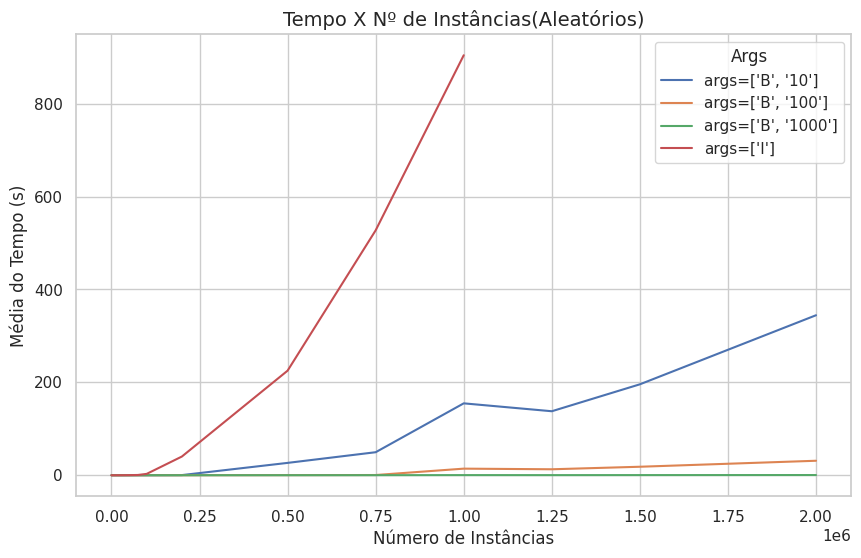

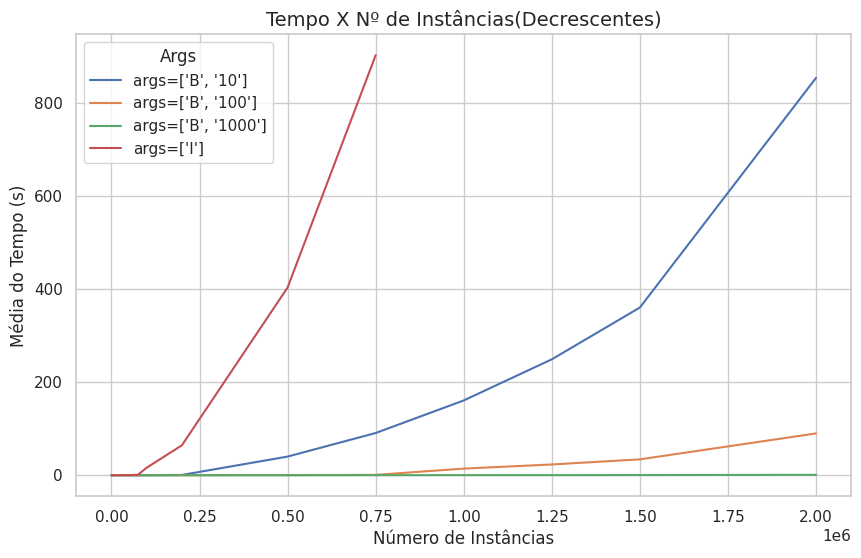

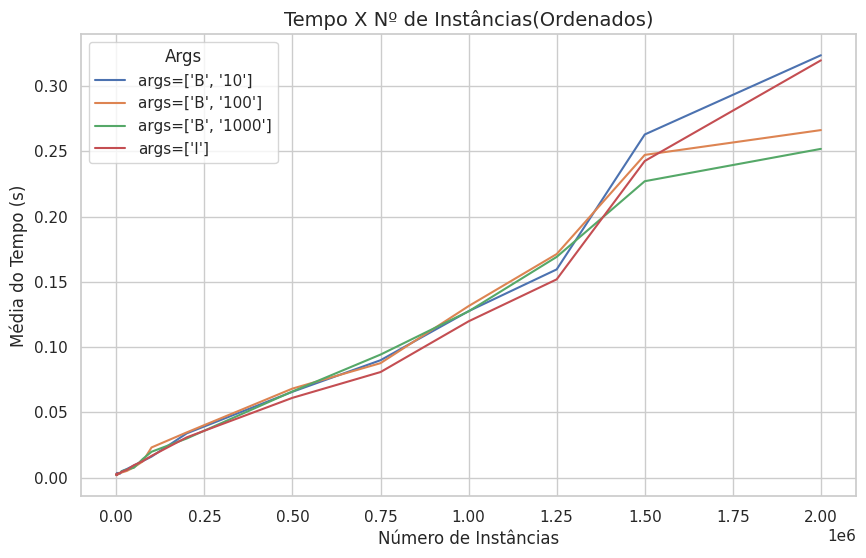

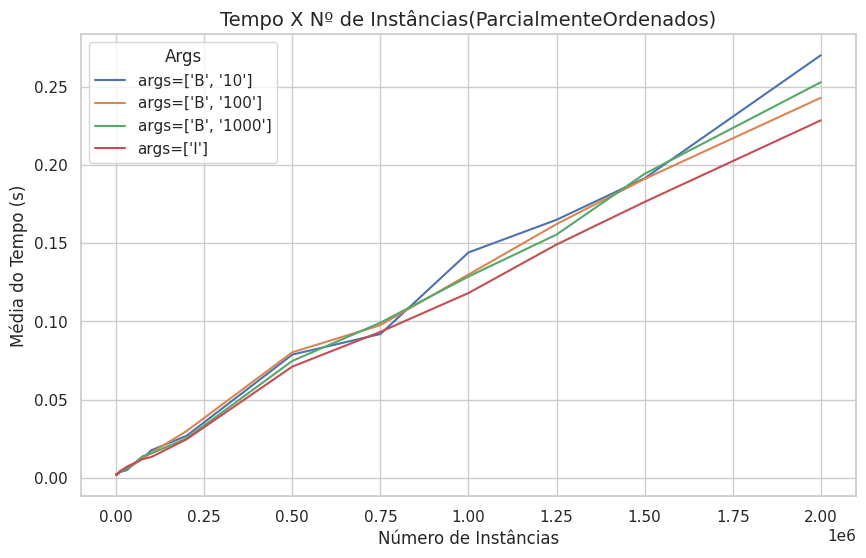

In [129]:

for df in df_summary['nome_do_dataset'].unique():
    plt.figure(figsize=(10, 6))
    df_img = df_summary[df_summary['nome_do_dataset'] == df]
    for arg in df_img['args'].unique():
        # Filtrando dados para o `arg` atual
        data_arg = df_img[df_img['args'] == arg]
        
        # Ordenando os dados por `num_instancias`
        data_arg = data_arg.sort_values(by='num_instancias')
        
        # Gerando o gráfico de linha
        plt.plot(data_arg['num_instancias'], data_arg['media_time'], label=f'args={arg}')

    # Personalizando o gráfico
    plt.title(f'Tempo X Nº de Instâncias({df})', fontsize=14)
    plt.xlabel('Número de Instâncias', fontsize=12)
    plt.ylabel('Média do Tempo (s)', fontsize=12)
    plt.legend(title='Args')
    plt.grid(True)

    # Exibindo o gráfico
    plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nome_do_dataset  307 non-null    object 
 1   args             307 non-null    object 
 2   num_instancias   307 non-null    int64  
 3   media_time       289 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.7+ KB


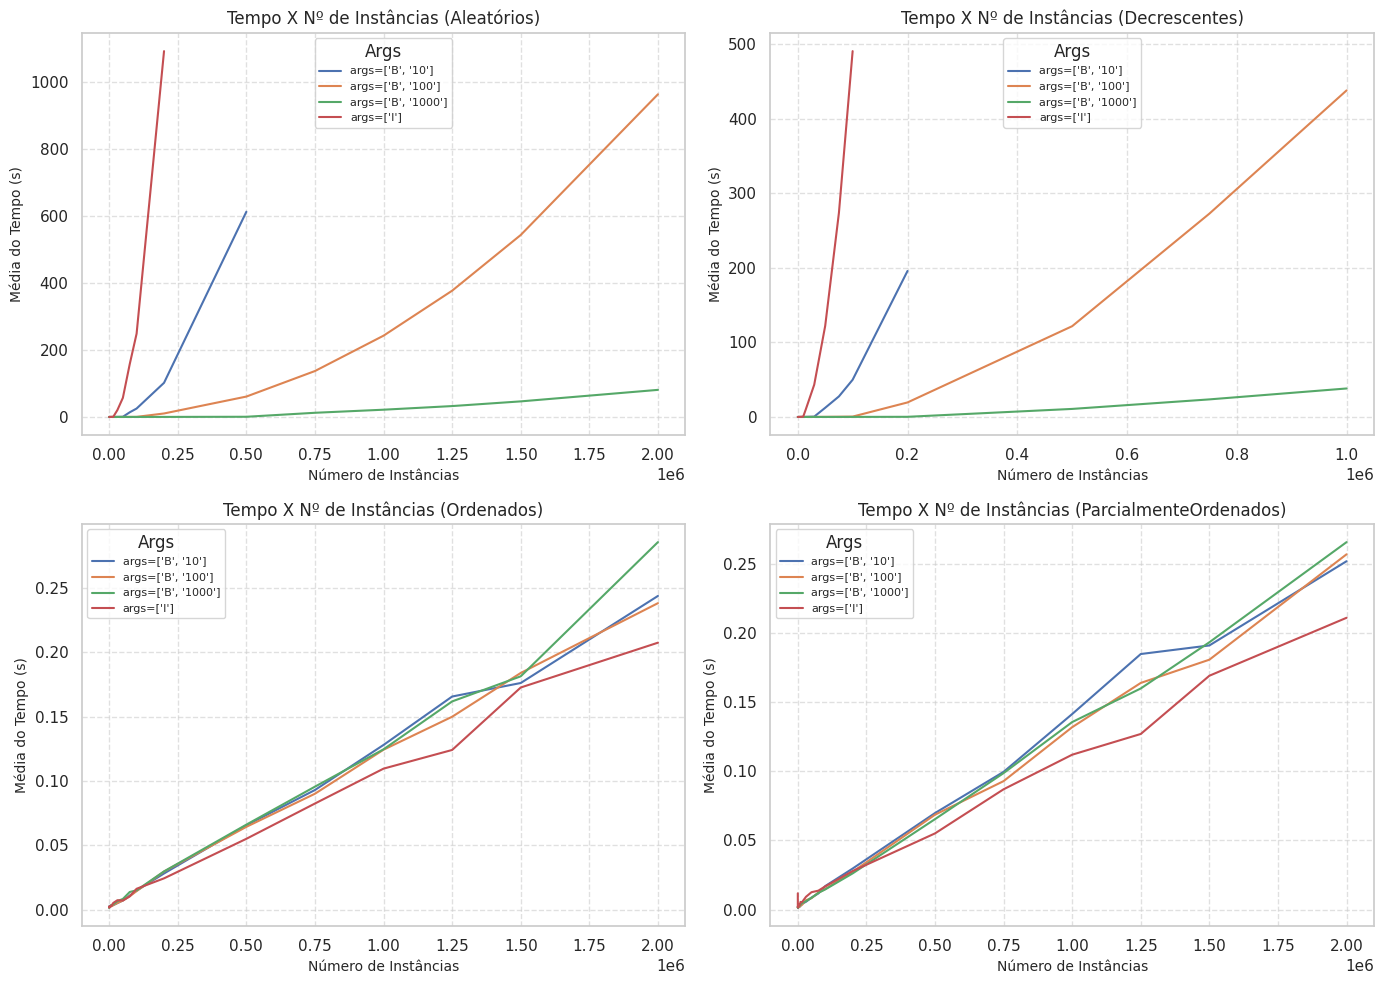

In [131]:

df_summaryO0 = (
    temposO0.groupby(['nome_do_dataset','args', 'num_instancias'], as_index=False)
    .agg(media_time=('time', 'mean'))
)

df_summaryO0.info()


# Criar a lista de datasets únicos
datasets = df_summaryO0['nome_do_dataset'].unique()

# Criar uma figura com 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Transformar em lista para iteração mais fácil

# Iterar sobre os datasets e os eixos
for idx, (dataset, ax) in enumerate(zip(datasets, axes)):
    # Filtrar os dados para o dataset atual
    df_img = df_summaryO0[df_summaryO0['nome_do_dataset'] == dataset]
    
    for arg in df_img['args'].unique():
        # Filtrar os dados para o argumento atual
        data_arg = df_img[df_img['args'] == arg]
        
        # Ordenar os dados por `num_instancias`
        data_arg = data_arg.sort_values(by='num_instancias')
        
        # Gerar o gráfico de linha no eixo atual
        ax.plot(data_arg['num_instancias'], data_arg['media_time'], label=f'args={arg}')

    # Personalizar o gráfico atual
    ax.set_title(f'Tempo X Nº de Instâncias ({dataset})', fontsize=12)
    ax.set_xlabel('Número de Instâncias', fontsize=10)
    ax.set_ylabel('Média do Tempo (s)', fontsize=10)
    ax.legend(title='Args', fontsize=8)
    ax.grid(True, linestyle='--', alpha=0.6)

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()